In [1]:
import tensorflow as tf
print("TF Version:", tf.__version__)

from tensorflow.keras.models import Sequential
print("✅ Sequential imported successfully!")

TF Version: 2.19.0
✅ Sequential imported successfully!


In [ ]:
!python -m pip install tensorflow

In [5]:
import sys
print(sys.executable)

c:\Users\User\AppData\Local\Programs\Python\Python310\python.exe


In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.models import Sequential
print("✅ TensorFlow is working perfectly now!")

TensorFlow version: 2.19.0
✅ TensorFlow is working perfectly now!


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [5]:
import os
print("Path exists:", os.path.exists(img_path))

Path exists: True


In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img_path=r"C:\Users\User\Desktop\UTKFace"
print("path exists")


path exists


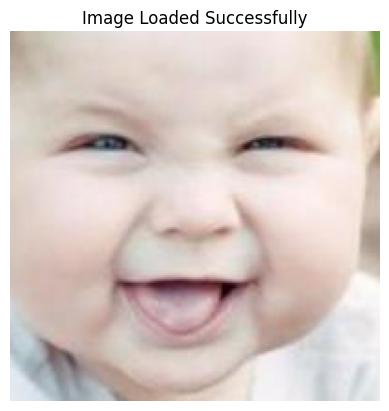

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img_path = r"c:\Users\User\Desktop\UTKFace\1_0_0_20161219200139603.jpg.chip.jpg"
img = Image.open(img_path).convert('RGB')
img = img.resize((200, 200))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
plt.imshow(img_array[0])
plt.axis("off")
plt.title("Image Loaded Successfully")
plt.show()

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

# CNN Model using Functional API
input_layer = Input(shape=(200, 200, 3))
x = Conv2D(16, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(10, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,718,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,724,394 (18.02 MB)

 Trainable params: 4,724,394 (18.02 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


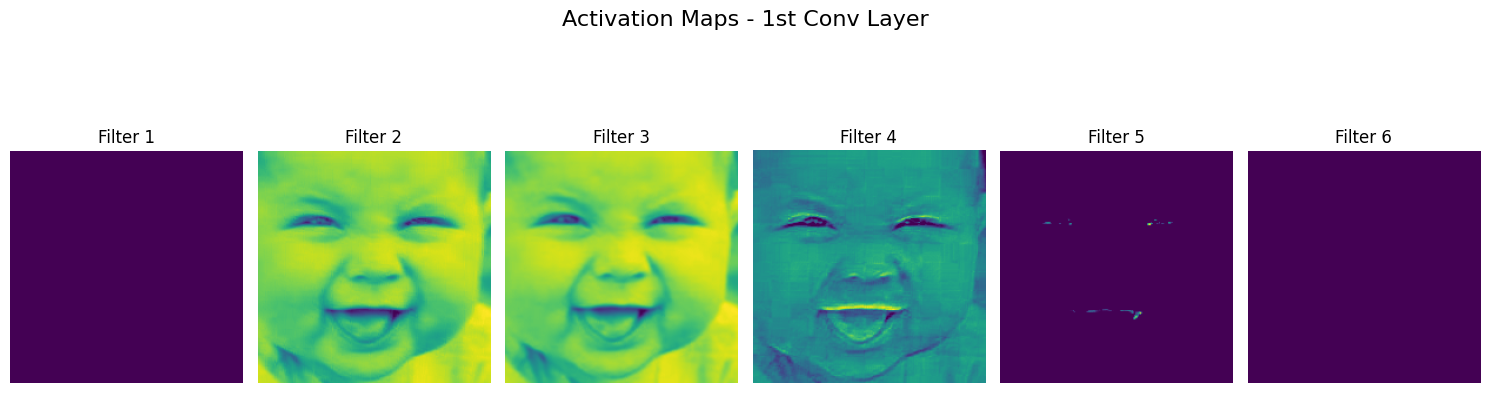

In [7]:
# Just like before, use the same preprocessed img_array
from tensorflow.keras.models import Model

# Get outputs of all conv layers
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]

# Activation model
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Run image through model
activations = activation_model.predict(img_array)

# Visualize activation map from first conv layer
first_layer_activation = activations[0]

# Plot first 6 feature maps
fig, axes = plt.subplots(1, 6, figsize=(15, 5))
for i in range(6):
    axes[i].imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    axes[i].axis('off')
    axes[i].set_title(f'Filter {i+1}')
plt.suptitle("Activation Maps - 1st Conv Layer", fontsize=16)
plt.tight_layout()
plt.show()